# **Importing libraries**



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Importing the Dataset**
The following code imports the dataset from the mounted drive.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset =pd.read_csv("/content/drive/MyDrive/heart.csv")
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## **Understanding Dataset**
Shape of dataset:

In [ ]:
dataset.shape

(303, 14)

Printing out 5 data samples:


In [ ]:
dataset.sample(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2,0
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
27,51,1,2,110,175,0,1,123,0,0.6,2,0,2,1
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1


Data Description: 

In [ ]:
dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Checking for any missing values and data types:

In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There are no missing values in the dataset. 

Checking correlation of with output:


In [ ]:
print(dataset.corr()["output"].abs().sort_values(ascending=False))

output      1.000000
exng        0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
caa         0.391724
slp         0.345877
thall       0.344029
sex         0.280937
age         0.225439
trtbps      0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: output, dtype: float64


The correlation of the columns with the output is shown above. As seen, the columns are moderately correlated with the output. Maximum correlation is for exng and minimum for fbs.

# **Exploratory Data Analysis**
Analysing the target (output) variable:

1    165
0    138
Name: output, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


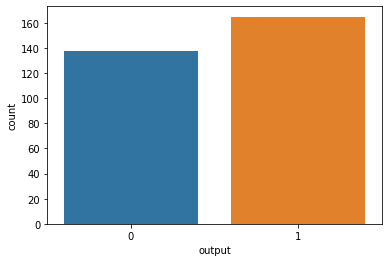

In [ ]:
y = dataset["output"]

sns.countplot(y)


output_temp = dataset.output.value_counts()

print(output_temp)

In [ ]:
print("Percentage of patience without heart problems: "+str(round(output_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(output_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


We can say that the dataset is balanced and there is no class imbalance.


Correlation Matrix:

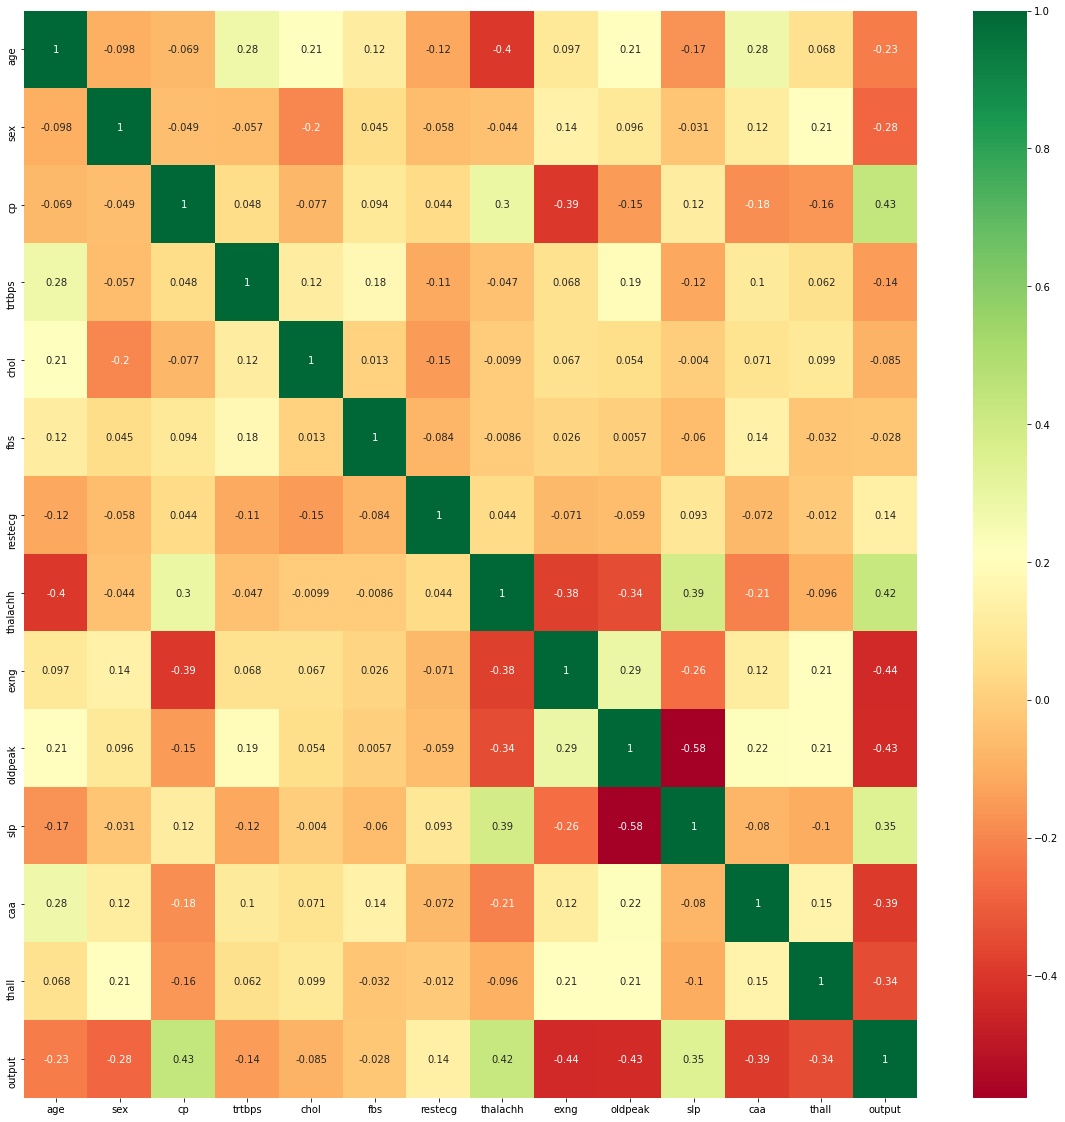

In [ ]:
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Distributions**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe9e963f50>,
      dtype=object)

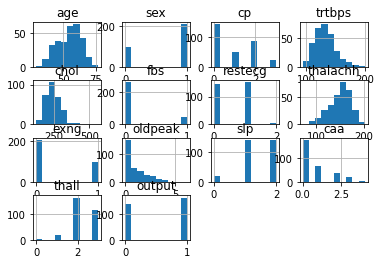

In [ ]:
dataset.hist()

**Categorical features vs Output**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


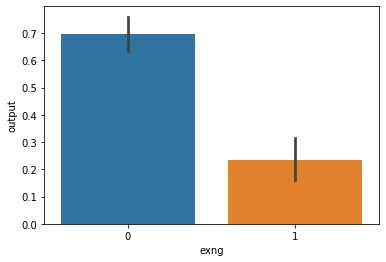

In [ ]:
sns.barplot(dataset["exng"],y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


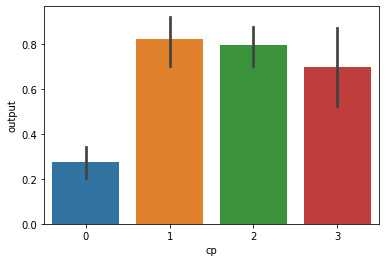

In [ ]:
sns.barplot(dataset["cp"],y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


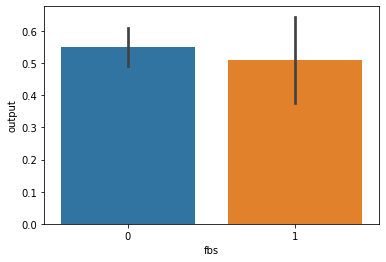

In [ ]:
sns.barplot(dataset["fbs"],y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


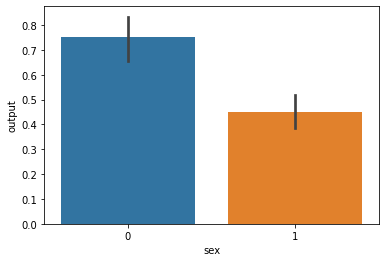

In [ ]:
sns.barplot(dataset["sex"],y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


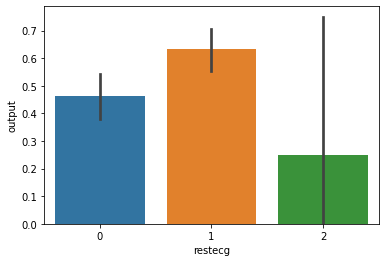

In [ ]:

sns.barplot(dataset["restecg"],y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


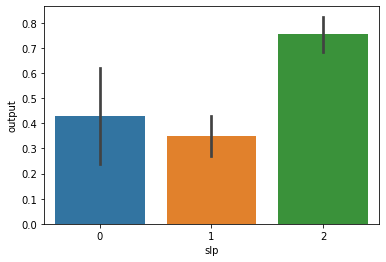

In [ ]:
sns.barplot(dataset["slp"],y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


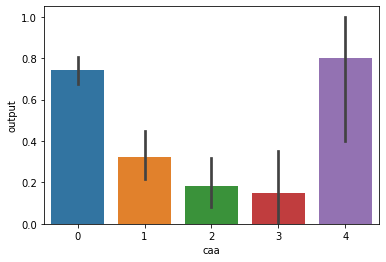

In [ ]:
sns.barplot(dataset["caa"],y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


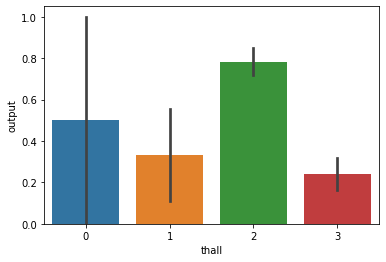

In [ ]:
sns.barplot(dataset["thall"],y)

**Density Plots**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

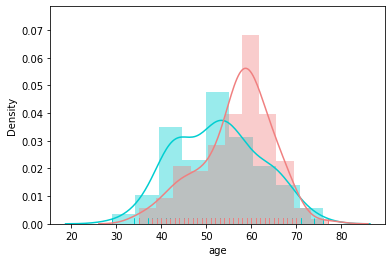

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

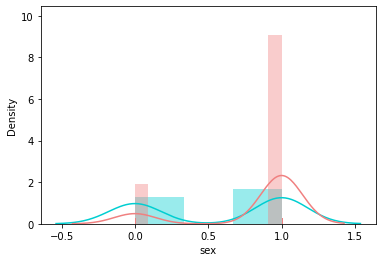

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

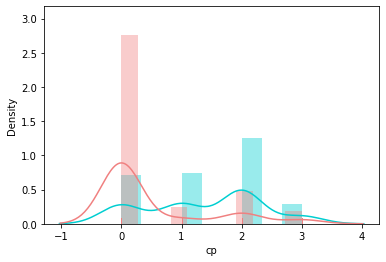

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

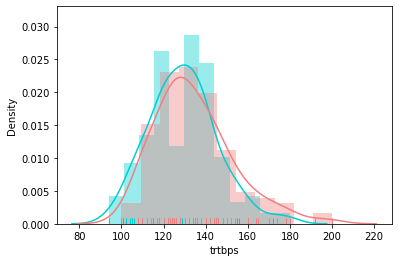

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

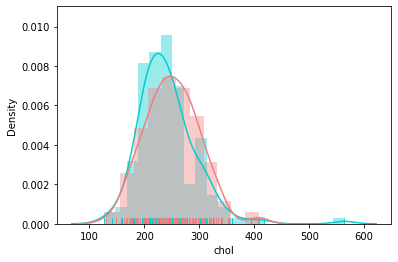

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

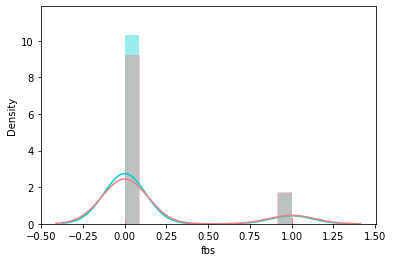

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

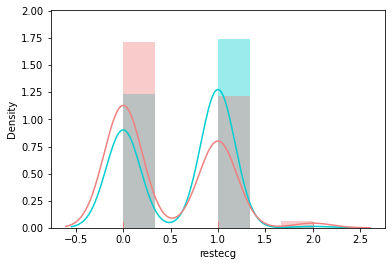

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

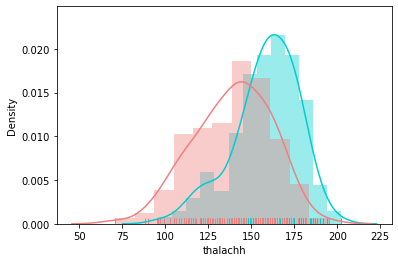

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

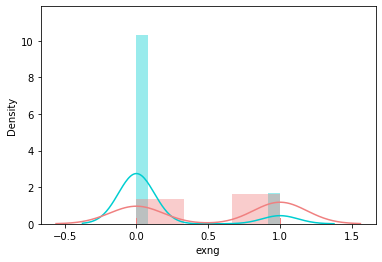

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

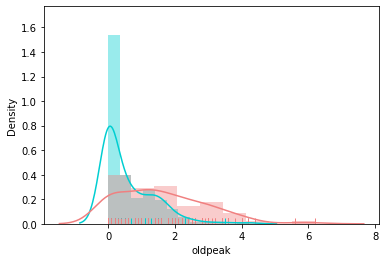

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

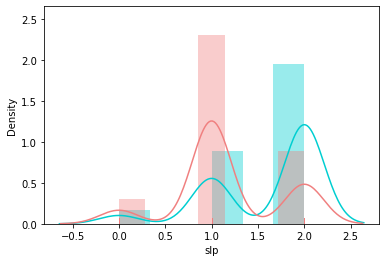

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

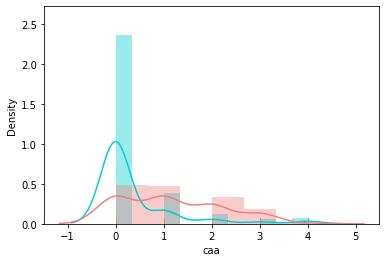

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

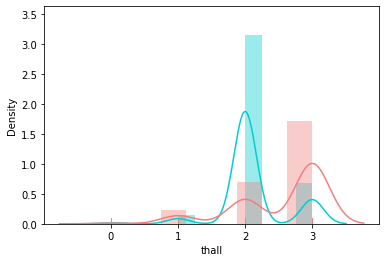

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexi

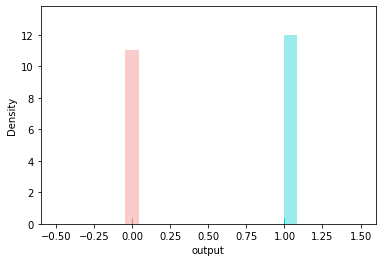

In [ ]:
for column in dataset.columns:
  sns.distplot(dataset[column][y == 1],color="darkturquoise", rug=True)
  sns.distplot(dataset[column][y == 0], color="lightcoral", rug=True);
  plt.show()

In [ ]:
#sns.pairplot(dataset)

# **Data Preprocessing**

In [ ]:

dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'])


In [ ]:
ds = dataset

In [ ]:
from sklearn.model_selection import train_test_split
Target = ds['output']
Features  = ds.drop('output',axis = 1)
X_train,X_test,y_train,y_test = train_test_split(Features,Target,test_size=0.2,random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
dataset.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exng_0,exng_1,slp_0,slp_1,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [ ]:
Y = dataset['output']
X = dataset.drop(['output'], axis = 1)


In [ ]:
X_train[columns_to_scale] = standardScaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = standardScaler.fit_transform(X_test[columns_to_scale])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

# **Models**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB




Logistic Regression

In [ ]:
mean_acc_scores = []
mean_f1_scores = [] 
algorithms = []

In [ ]:
lr = LogisticRegression()
model_scorelr_f1 =cross_val_score(estimator=lr,X=X,y=Y,scoring='f1', cv=10)
algorithms.append('lr')
print(model_scorelr_f1)
print(model_scorelr_f1.mean())
model_scorelr_acc =cross_val_score(estimator=LogisticRegression(),X=X,y=Y, cv=10)
print(model_scorelr_acc)
print(model_scorelr_acc.mean())
mean_acc_scores.append(model_scorelr_acc.mean())
mean_f1_scores.append(model_scorelr_f1.mean())

[0.91891892 0.91428571 0.85714286 0.9375     0.88888889 0.74074074
 0.875      0.90909091 0.8        0.78787879]
0.8629446816946815
[0.90322581 0.90322581 0.83870968 0.93333333 0.86666667 0.76666667
 0.86666667 0.9        0.76666667 0.76666667]
0.8511827956989247


Logistic Regression train test

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(acc)
print(f1)

0.8852459016393442
0.8888888888888888


SVM:

In [ ]:
model_scoresvm =cross_val_score(estimator=svm.SVC(C=1, kernel='linear'),X=X,y=Y, cv=10)
print(model_scoresvm)
print(model_scoresvm.mean())

[0.87096774 0.90322581 0.80645161 0.9        0.83333333 0.83333333
 0.9        0.76666667 0.76666667 0.73333333]
0.8313978494623656


In [ ]:
model_scoresvm_p =cross_val_score(estimator=svm.SVC(C=1, kernel='poly'),X=X,y=Y, cv=10)
print(model_scoresvm_p)
print(model_scoresvm_p.mean())

[0.90322581 0.87096774 0.87096774 0.93333333 0.83333333 0.86666667
 0.8        0.8        0.73333333 0.83333333]
0.844516129032258


In [ ]:
sv = svm.SVC(C=1, kernel='sigmoid')
model_scoresvm_s_f1 =cross_val_score(estimator=sv,X=X,y=Y,scoring='f1',cv=10)
algorithms.append('sv')
print(model_scoresvm_s_f1)
print(model_scoresvm_s_f1.mean())
model_scoresvm_s_acc =cross_val_score(estimator=svm.SVC(C=1, kernel='sigmoid'),X=X,y=Y, cv=10)
print(model_scoresvm_s_acc)
print(model_scoresvm_s_acc.mean())
mean_acc_scores.append(model_scoresvm_s_acc.mean())
mean_f1_scores.append(model_scoresvm_s_f1.mean())

[0.88888889 0.82352941 0.88888889 0.96969697 0.85714286 0.71428571
 0.90909091 0.88235294 0.82352941 0.8125    ]
0.8569905992700111
[0.87096774 0.80645161 0.87096774 0.96666667 0.83333333 0.73333333
 0.9        0.86666667 0.8        0.8       ]
0.8448387096774193


Test train

In [ ]:
sv = svm.SVC(C=1, kernel='sigmoid')
sv.fit(X_train,y_train)
y_pred_sv = sv.predict(X_test)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
acc_sv = accuracy_score(y_test,y_pred_sv)
f1_sv = f1_score(y_test,y_pred_sv)
print(acc_sv)
print(f1_sv)

0.8852459016393442
0.8852459016393444


In [ ]:
model_scoresvm_r =cross_val_score(estimator=svm.SVC(C=1, kernel='rbf'),X=X,y=Y, cv=10)
print(model_scoresvm_r)
print(model_scoresvm_r.mean())

[0.90322581 0.83870968 0.87096774 0.96666667 0.83333333 0.8
 0.83333333 0.83333333 0.73333333 0.76666667]
0.8379569892473118


KNN:

In [ ]:
knn_scores = []
for k in range(1,15):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,Y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

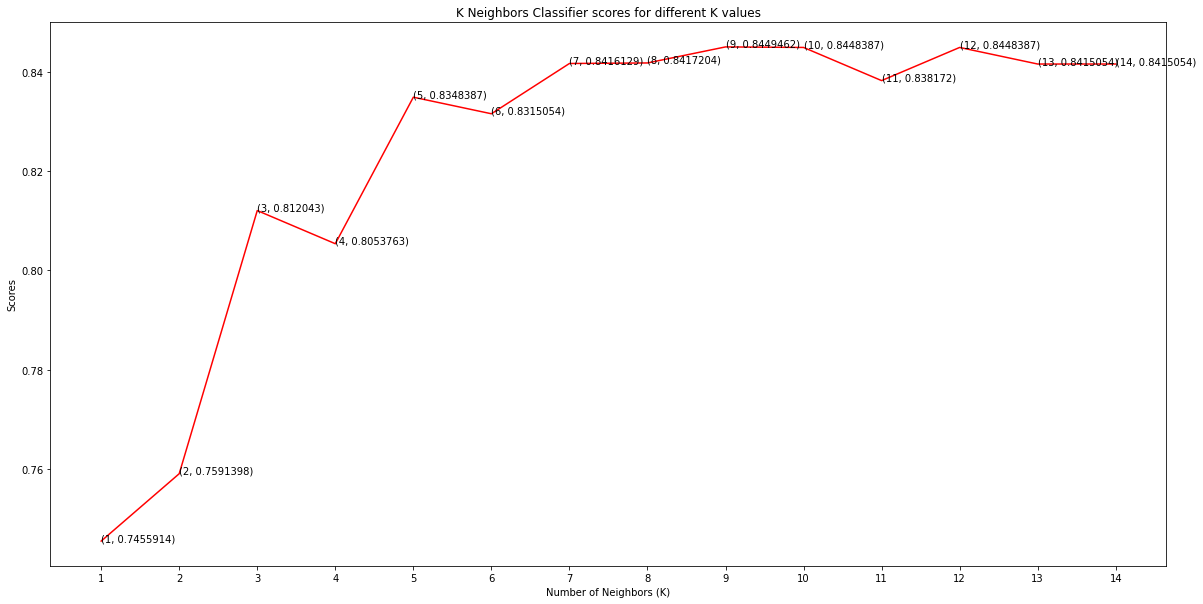

In [ ]:
plt.figure(figsize=(20,10))
plt.plot([k for k in range(1,15)], knn_scores, color = 'red')
for i in range(1,15):
    j = round(knn_scores[i-1],7)
    plt.text(i, j , (i,j))
plt.xticks([i for i in range(1,15)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 9)
algorithms.append('knn')
score_knn_f1 = cross_val_score(knn_classifier,X,Y,scoring='f1',cv=10)
print(score_knn_f1)
print(score_knn_f1.mean())
score_knn_acc = cross_val_score(knn_classifier,X,Y,scoring='accuracy',cv=10)
print(score_knn_acc)
print(score_knn_acc.mean())
mean_acc_scores.append(score_knn_acc.mean())
mean_f1_scores.append(score_knn_f1.mean())

[0.91891892 0.8        0.85714286 0.9375     0.91428571 0.77419355
 0.90322581 0.84848485 0.76470588 0.875     ]
0.8593457576023991
[0.90322581 0.77419355 0.83870968 0.93333333 0.9        0.76666667
 0.9        0.83333333 0.73333333 0.86666667]
0.8449462365591398


test train


In [ ]:

knn_classifier.fit(X_train,y_train)
y_pred_knn = knn_classifier.predict(X_test)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
acc_knn = accuracy_score(y_test,y_pred_knn)
f1_knn = f1_score(y_test,y_pred_knn)
print(acc_knn)
print(f1_knn)

0.8688524590163934
0.8787878787878787


Decision Tree:

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=0)
score_dt_f1 = cross_val_score(dt_classifier,X,y,scoring='f1',cv=10)
print(score_dt_f1)
print(score_dt_f1.mean())
score_dt_acc = cross_val_score(dt_classifier,X,y,scoring='accuracy',cv=10)
print(score_dt_acc)
print(score_dt_acc.mean())


[0.87179487 0.77419355 0.82352941 0.83870968 0.72727273 0.73333333
 0.58823529 0.86486486 0.76470588 0.78787879]
0.7774518399186331
[0.83870968 0.77419355 0.80645161 0.83333333 0.7        0.73333333
 0.53333333 0.83333333 0.73333333 0.76666667]
0.7552688172043011


In [ ]:
# step-1: create a cross-validation scheme
from sklearn.model_selection import KFold
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1,14))}]


# step-3: perform grid search
# 3.1 specify model
dt_classifier.fit(X, y)
from sklearn.feature_selection import RFE
rfe = RFE(dt_classifier)             

# 3.2 call GridSearchCV()
from sklearn.model_selection import GridSearchCV
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'f1', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X, y)                  

Fitting 10 folds for each of 13 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    6.0s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                            class_weight=None,
                                                            criterion='gini',
                                                            max_depth=None,
                                                            max_features=None,
                                                            max_leaf_nodes=None,
                                                            min_impurity_decrease=0.0,
                                                            min_impurity_split=None,
                                                            min_samples_leaf=1,
                                                            min_samples_split=2,
                                                            min_weight_fraction_leaf=0.0,
           

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.050492,0.002293,0.001881,0.000039,1,{'n_features_to_select': 1},0.538462,0.722222,0.800000,0.594595,0.500000,0.588235,0.700000,0.580645,0.600000,0.647059,0.627122,0.086097,13,0.836237,0.819188,0.783505,0.786207,0.750000,0.807843,0.773519,0.820513,0.840989,0.816479,0.803448,0.027677
1,0.047673,0.001840,0.001864,0.000026,2,{'n_features_to_select': 2},0.437500,0.777778,0.717949,0.625000,0.666667,0.789474,0.684211,0.562500,0.600000,0.727273,0.658835,0.101476,12,0.993464,0.993197,0.801444,0.993197,0.841727,0.993007,0.958042,0.914894,0.926667,0.996587,0.941223,0.066711
2,0.047748,0.002901,0.002161,0.000577,3,{'n_features_to_select': 3},0.642857,0.750000,0.697674,0.666667,0.733333,0.878049,0.722222,0.687500,0.583333,0.689655,0.705129,0.073348,9,0.996743,0.996610,0.958904,0.996610,0.996633,0.996516,0.986301,0.993243,0.993421,1.000000,0.991498,0.011401
3,0.046170,0.001846,0.001898,0.000065,4,{'n_features_to_select': 4},0.666667,0.848485,0.714286,0.562500,0.733333,0.731707,0.685714,0.764706,0.592593,0.580645,0.688064,0.085518,10,1.000000,1.000000,0.982818,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.998282,0.005155
4,0.045420,0.002630,0.001908,0.000042,5,{'n_features_to_select': 5},0.608696,0.777778,0.702703,0.562500,0.709677,0.820513,0.705882,0.750000,0.476190,0.709677,0.682362,0.098754,11,1.000000,1.000000,0.989691,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.998969,0.003093
5,0.042760,0.001373,0.002131,0.000532,6,{'n_features_to_select': 6},0.560000,0.833333,0.777778,0.588235,0.714286,0.930233,0.833333,0.812500,0.500000,0.750000,0.729970,0.131561,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.042275,0.002375,0.001873,0.000112,7,{'n_features_to_select': 7},0.608696,0.833333,0.842105,0.666667,0.774194,0.904762,0.800000,0.666667,0.583333,0.882353,0.756211,0.110104,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.039942,0.001881,0.002062,0.000417,8,{'n_features_to_select': 8},0.521739,0.810811,0.789474,0.628571,0.800000,0.878049,0.685714,0.750000,0.608696,0.848485,0.732154,0.110279,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.039481,0.002096,0.001880,0.000049,9,{'n_features_to_select': 9},0.545455,0.769231,0.842105,0.628571,0.774194,0.818182,0.666667,0.750000,0.421053,0.882353,0.709781,0.136808,8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.036736,0.001177,0.001875,0.000016,10,{'n_features_to_select': 10},0.545455,0.789474,0.810811,0.628571,0.838710,0.844444,0.666667,0.727273,0.608696,0.864865,0.732496,0.107790,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


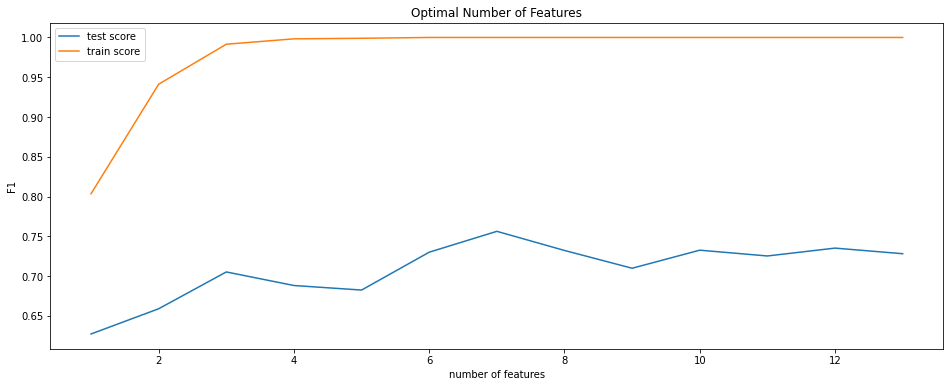

In [ ]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('F1')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [ ]:
rfe_dt = RFE(dt_classifier,n_features_to_select=7)
score_dtrfe_f1 = cross_val_score(rfe_dt,X,y,scoring='f1',cv=10)
score_dtrfe_acc = cross_val_score(rfe_dt,X,y,scoring='accuracy',cv=10)
algorithms.append('Decision Tree')
print(score_dtrfe_f1)
print(score_dtrfe_f1.mean())
print(score_dtrfe_acc)
print(score_dtrfe_acc.mean())
mean_acc_scores.append(score_dtrfe_acc.mean())
mean_f1_scores.append(score_dtrfe_f1.mean())

[0.89473684 0.70967742 0.87179487 0.84848485 0.81081081 0.78787879
 0.6        0.76470588 0.7027027  0.8125    ]
0.7803292165485065
[0.87096774 0.70967742 0.83870968 0.83333333 0.76666667 0.76666667
 0.6        0.73333333 0.63333333 0.8       ]
0.755268817204301


In [ ]:
rfe_dt.fit(X_train,y_train)
y_pred_dt = rfe_dt.predict(X_test)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
acc_dt = accuracy_score(y_test,y_pred_dt)
f1_dt = f1_score(y_test,y_pred_dt)
print(acc_dt)
print(f1_dt)

0.8360655737704918
0.8387096774193549


In [ ]:
# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features
#rfe_dt.support_

Random Forest:

In [ ]:
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 5, 1), 
            'max_features': ['auto', 'log2', 7, 13]
        }
    }
}


In [ ]:
scores ={}
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],scoring = 'f1',cv=10,return_train_score=False)
    model_selection.fit(X,y)
    dict1 = {
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    }
    scores.update(dict1)

In [ ]:
print(scores)
mean_f1_scores.append(scores['best_score'])

{'model': 'RandomForestClassifier', 'best_score': 0.8713865976365975, 'best_params': {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'n_estimators': 10}}


In [ ]:
scores_acc ={}
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],scoring = 'accuracy',cv=10,return_train_score=False)
    model_selection.fit(X,y)
    dict2 ={
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    }
    scores_acc.update(dict2)
print(scores_acc)
mean_acc_scores.append(scores_acc['best_score'])

{'model': 'RandomForestClassifier', 'best_score': 0.8578494623655913, 'best_params': {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'n_estimators': 100}}


In [ ]:
print(algorithms)
print(mean_acc_scores)
print(mean_f1_scores)

['lr', 'sv', 'knn', 'Decision Tree']
[0.8511827956989247, 0.8448387096774193, 0.8449462365591398, 0.755268817204301, 0.8578494623655913]
[0.8629446816946815, 0.8569905992700111, 0.8593457576023991, 0.7803292165485065, 0.8713865976365975]


In [ ]:
rf = RandomForestClassifier(criterion= 'gini', max_depth= 4, max_features= 'log2', n_estimators=50)
algorithms.append('RF')
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test,y_pred_rf)
f1_rf = f1_score(y_test,y_pred_rf)
print(acc_rf)
print(f1_rf)

0.8852459016393442
0.8923076923076922


Gaussian Naive Bayes:

In [ ]:
nb_classifier = GaussianNB()
algorithms.append('NB')
score_nb_f1 = cross_val_score(nb_classifier,X,y,scoring='f1',cv=10)
print(score_nb_f1)
print(score_nb_f1.mean())
score_nb_acc = cross_val_score(nb_classifier,X,y,scoring='accuracy',cv=10)
print(score_nb_acc)
print(score_nb_acc.mean())
mean_acc_scores.append(score_nb_acc.mean())
mean_f1_scores.append(score_nb_f1.mean())

[0.85714286 0.8        0.86486486 0.90322581 0.82352941 0.78571429
 0.66666667 0.90909091 0.70588235 0.82352941]
0.8139646566401785
[0.83870968 0.77419355 0.83870968 0.9        0.8        0.8
 0.7        0.9        0.66666667 0.8       ]
0.8018279569892475


In [ ]:
from xgboost import XGBClassifier
model_param ={
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}
algorithms.append('XGBClassifier')

In [ ]:
scores_xgb ={}
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],scoring = 'f1',cv=10,return_train_score=False)
    model_selection.fit(X,y)
    dict3={
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    }
    scores_xgb.update(dict3)

In [ ]:
print(scores_xgb)
mean_f1_scores.append(scores_xgb['best_score'])

{'model': 'XGBClassifier', 'best_score': 0.8612327768945416, 'best_params': {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 10}}


In [ ]:
scores_xgb_acc = {}
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],scoring = 'accuracy',cv=10,return_train_score=False)
    model_selection.fit(X,y)
    dict4 = {
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    }
    scores_xgb_acc.update(dict4)
print(scores_xgb_acc)
mean_acc_scores.append(scores_xgb_acc['best_score'])


{'model': 'XGBClassifier', 'best_score': 0.8443010752688173, 'best_params': {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 10}}


ANN:


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 11)                341       
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 12        
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
5/5 [==============================] - 1s 71ms/step - loss: 0.7184 - accuracy: 0.5017 - val_loss: 0.6881 - val_accuracy: 0.5135
Epoch 2/250
5/5 [==============================] - 0s 6ms/step - loss: 0.6948 - accuracy: 0.5416 - val_loss: 0.6722 - val_accuracy: 0.4865
Epoch 3/250
5/5 [==============================] - 0s 5ms/step - loss: 0.6658 - accuracy: 0.5832 - val_loss: 0.6573 - val_accuracy: 0.4865
Epoch 4/250
5/5 [==============================] - 0s 5ms/step - loss: 0.6593 - accuracy: 0.5984 - 

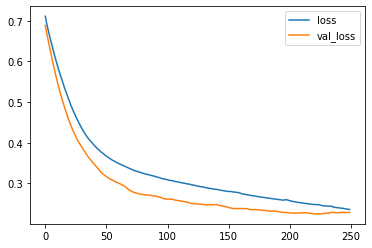

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
model = Sequential()
model.add(Dense(units=11, activation='relu', input_dim=30))
model.add(Dense(units=1, activation ='sigmoid'))
model.summary()
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
ann = model.fit(X_train, y_train, epochs=250, batch_size=50,validation_split=0.15)
y_pred_ann = model.predict(X_test)
pd.DataFrame(ann.history)[['loss','val_loss']].plot()
algorithms.append('ann')

0.8688524590163934


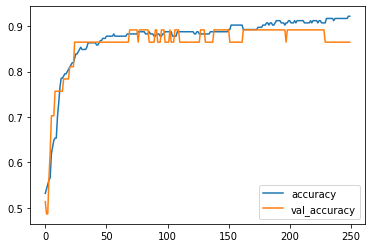

In [ ]:
pd.DataFrame(ann.history)[['accuracy','val_accuracy']].plot()
rounded = [round(x[0]) for x in y_pred_ann]
y_pred_ann = rounded
accuracy_ann = accuracy_score(y_test,y_pred_ann)
f1_ann = f1_score(y_test,y_pred_ann)
print(accuracy_ann)
mean_acc_scores.append(accuracy_ann)
mean_f1_scores.append(f1_ann)

# **Insights**

In [ ]:
print(algorithms)
print(mean_acc_scores)
print(mean_f1_scores)

['lr', 'sv', 'knn', 'Decision Tree', 'RF', 'NB', 'XGBClassifier', 'ann']
[0.8511827956989247, 0.8448387096774193, 0.8449462365591398, 0.755268817204301, 0.8578494623655913, 0.8018279569892475, 0.8443010752688173, 0.8688524590163934]
[0.8629446816946815, 0.8569905992700111, 0.8593457576023991, 0.7803292165485065, 0.8713865976365975, 0.8139646566401785, 0.8612327768945416, 0.870967741935484]


In [ ]:
for i in range(len(algorithms)):
  sca = round(mean_acc_scores[i],2)
  print('Accuracy score using '+algorithms[i] + ' is ' + str(sca))

Accuracy score using lr is 0.85
Accuracy score using sv is 0.84
Accuracy score using knn is 0.84
Accuracy score using Decision Tree is 0.76
Accuracy score using RF is 0.86
Accuracy score using NB is 0.8
Accuracy score using XGBClassifier is 0.84
Accuracy score using ann is 0.87


In [ ]:
for i in range(len(algorithms)):
  scf = round(mean_f1_scores[i],2)
  print('F1 score using '+algorithms[i] + ' is ' + str(scf))

F1 score using lr is 0.86
F1 score using sv is 0.86
F1 score using knn is 0.86
F1 score using Decision Tree is 0.78
F1 score using RF is 0.87
F1 score using NB is 0.81
F1 score using XGBClassifier is 0.86
F1 score using ann is 0.87


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


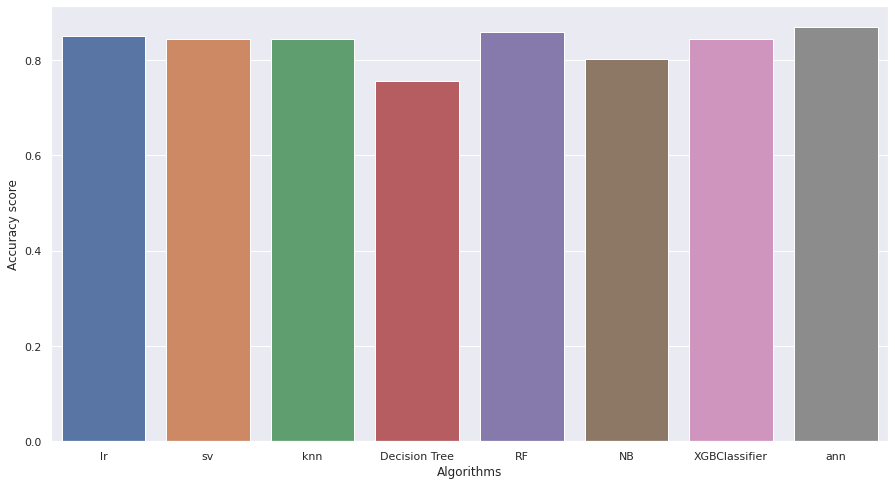

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,mean_acc_scores)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


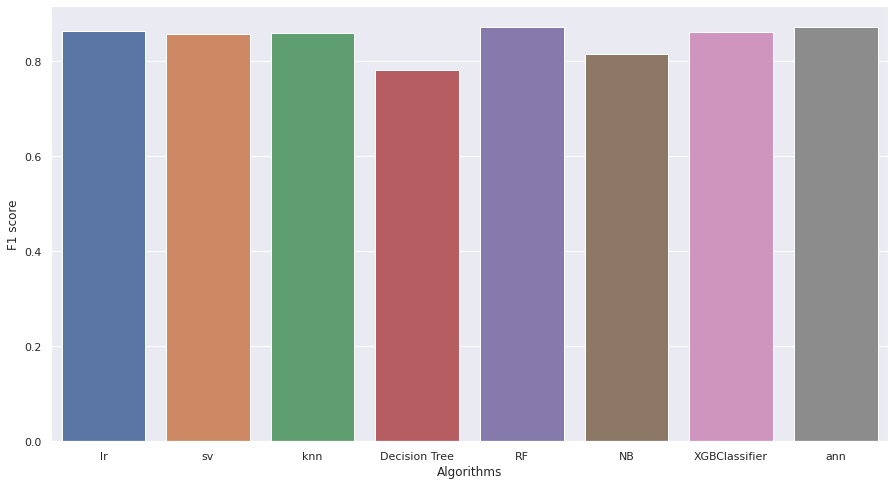

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("F1 score")

sns.barplot(algorithms,mean_f1_scores)

Final Model selected: Random Forest with Accuracy score = 86% and
F1 score = 87%

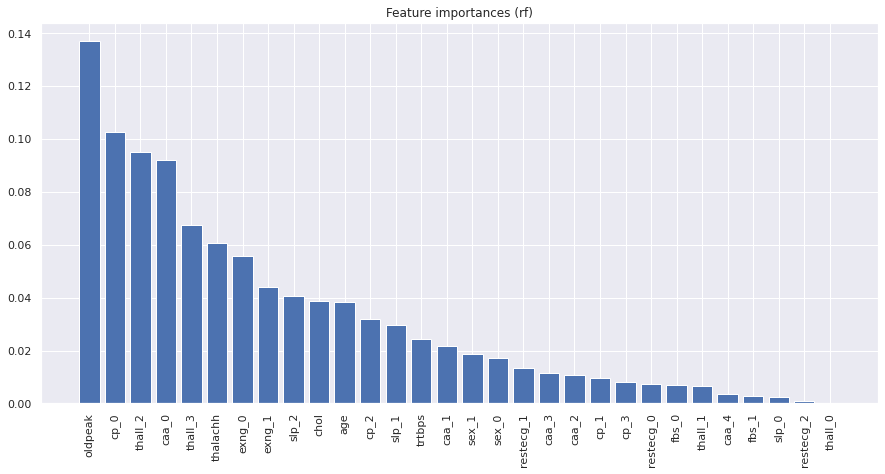

In [ ]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X.columns, rf.feature_importances_), key=lambda x: x[1] * -1)
rf_feature_importances = pd.DataFrame(values, columns = headers)
import numpy as np

#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(rf_feature_importances))
plt.bar(x_pos, rf_feature_importances['score'])
plt.xticks(x_pos, rf_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (rf)')

plt.show()

Random Forest Conusion Matrix

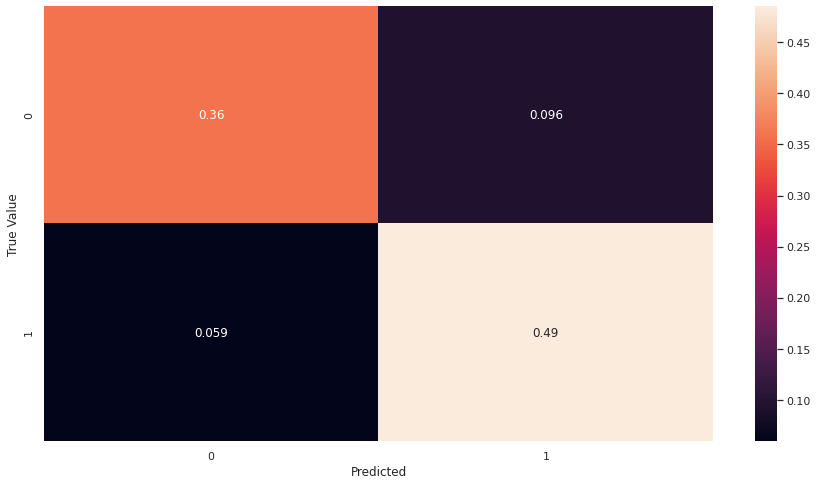

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred_rf = cross_val_predict(rf, X, y, cv=10)
cm = confusion_matrix(y, y_pred_rf,normalize='all')
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()


ANN confusion matrix:

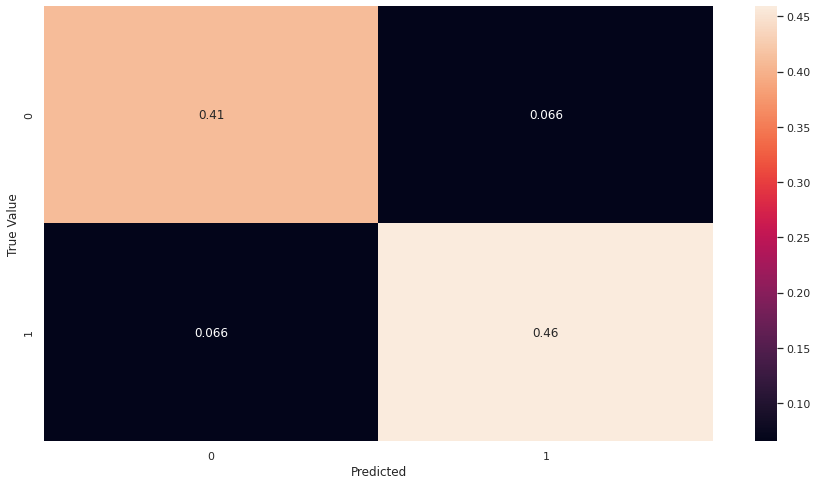

In [ ]:
cma = confusion_matrix(y_test, y_pred_ann,normalize='all')
sns.heatmap(cma, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()